# Spearman's correlation coefficient tests for screen and frame image data

In [1]:
from itertools import islice

import cv2 as cv
from dateutil.parser import parse as datetime_parse
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from video699.screen.annotated import AnnotatedScreenDetector
from video699.video.annotated import get_videos

get_nth = lambda iterator, n: next(islice(iterator, n - 1, n))

VIDEO = get_videos()['https://is.muni.cz/auth/el/1433/jaro2016/IV109/um/vi/?videomuni=IV109-D2-20160406.mp4']

Pearson's r between left and middle images:  0.8395073461843322
Spearman's r between left and middle images: 0.6498803132368666

Pearson's r between left and right images:   0.7139098965150965
Spearman's r between left and right images:  0.5065739283953213


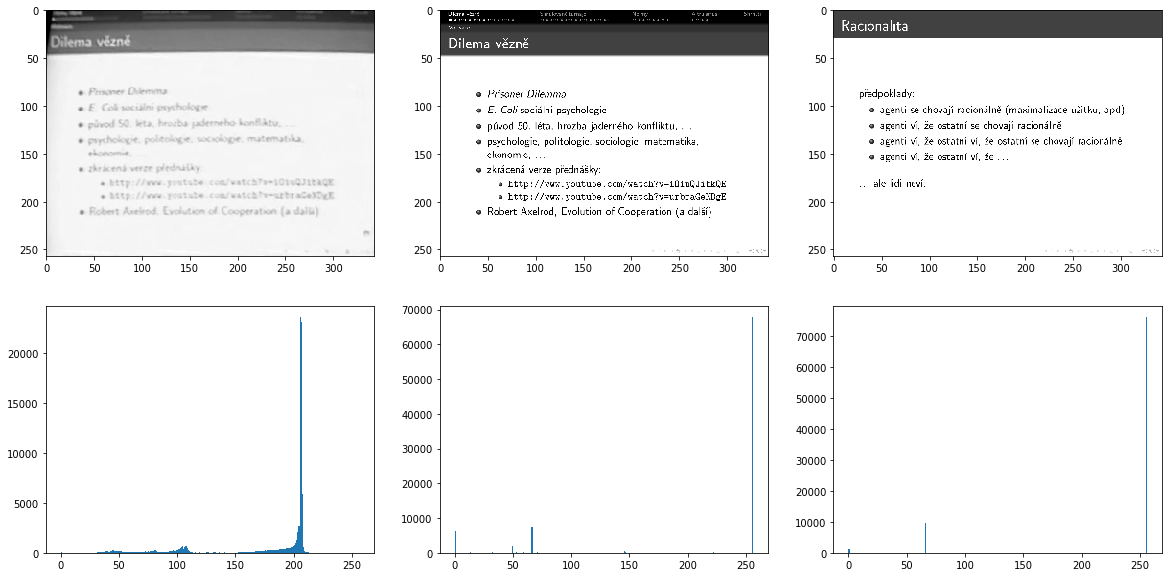

In [2]:
FRAME = get_nth(VIDEO, 8)
SCREEN, *_ = sorted(
    AnnotatedScreenDetector('fimu', 'd2', 'default_2004').detect(FRAME),
    key=lambda screen: screen.coordinates,
)
SCREEN_ALPHA = SCREEN.image[:,:,3]
SCREEN_IMAGE = cv.cvtColor(SCREEN.image, cv.COLOR_RGBA2GRAY)

CORRECT_PAGE = get_nth(VIDEO.documents['slides02.pdf'], 3)
CORRECT_PAGE_ALPHA = CORRECT_PAGE.image(SCREEN.width, SCREEN.height)[:,:,3]
CORRECT_PAGE_IMAGE = cv.cvtColor(CORRECT_PAGE.image(SCREEN.width, SCREEN.height), cv.COLOR_RGBA2GRAY)

INCORRECT_PAGE = get_nth(VIDEO.documents['slides01.pdf'], 7)
INCORRECT_PAGE_ALPHA = INCORRECT_PAGE.image(SCREEN.width, SCREEN.height)[:,:,3]
INCORRECT_PAGE_IMAGE = cv.cvtColor(INCORRECT_PAGE.image(SCREEN.width, SCREEN.height), cv.COLOR_RGBA2GRAY)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1).imshow(SCREEN_IMAGE, cmap='gray')
plt.subplot(2, 3, 2).imshow(CORRECT_PAGE_IMAGE, cmap='gray')
plt.subplot(2, 3, 3).imshow(INCORRECT_PAGE_IMAGE, cmap='gray')

plt.subplot(2, 3, 4).hist(SCREEN_IMAGE[SCREEN_ALPHA.nonzero()], range=(0, 256), bins=256)
plt.subplot(2, 3, 5).hist(CORRECT_PAGE_IMAGE[CORRECT_PAGE_ALPHA.nonzero()], range=(0, 256), bins=256)
plt.subplot(2, 3, 6).hist(INCORRECT_PAGE_IMAGE[INCORRECT_PAGE_ALPHA.nonzero()], range=(0, 256), bins=256)

nonzero_alpha = np.minimum(SCREEN_ALPHA, CORRECT_PAGE_ALPHA).nonzero()
print(
    "Pearson's r between left and middle images:  {}".format(
        *pearsonr(SCREEN_IMAGE[nonzero_alpha], CORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)
print(
    "Spearman's r between left and middle images: {}".format(
        *spearmanr(SCREEN_IMAGE[nonzero_alpha], CORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)

print()

nonzero_alpha = np.minimum(SCREEN_ALPHA, INCORRECT_PAGE_ALPHA).nonzero()
print(
    "Pearson's r between left and right images:   {}".format(
        *pearsonr(SCREEN_IMAGE[nonzero_alpha], INCORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)
print(
    "Spearman's r between left and right images:  {}".format(
        *spearmanr(SCREEN_IMAGE[nonzero_alpha], INCORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)

plt.savefig('figures/correlation-successful.pdf')

Pearson's r between left and middle images:  0.7709533279561702
Spearman's r between left and middle images: 0.4719093128441715

Pearson's r between left and right images:   0.7786970610919519
Spearman's r between left and right images:  0.49625005941866174


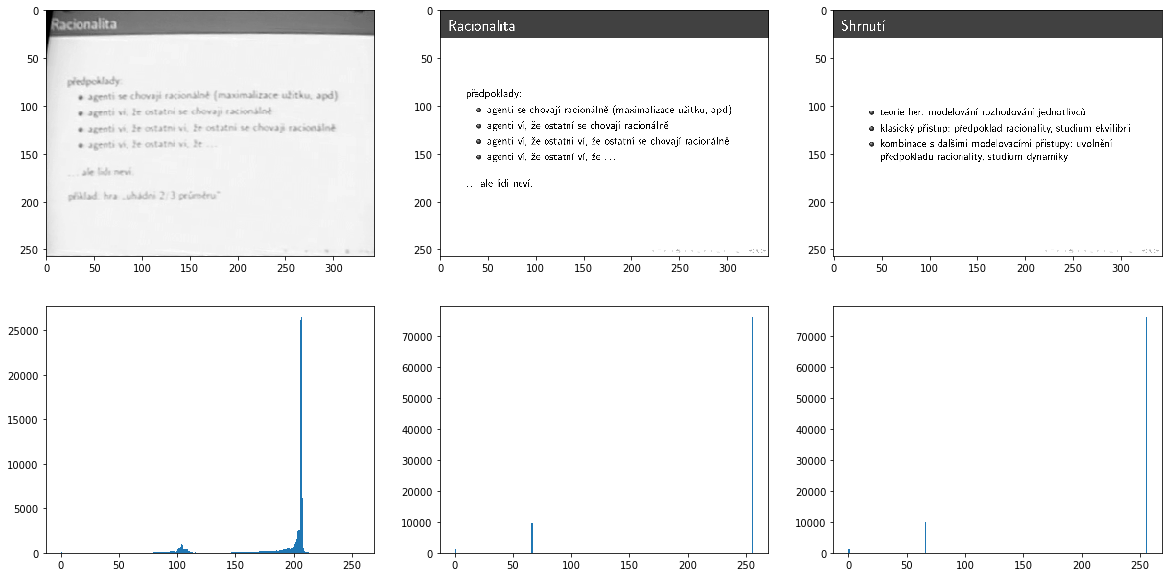

In [3]:
FRAME = get_nth(VIDEO, 3)
SCREEN, *_ = sorted(
    AnnotatedScreenDetector('fimu', 'd2', 'default_2004').detect(FRAME),
    key=lambda screen: screen.coordinates,
)
SCREEN_ALPHA = SCREEN.image[:,:,3]
SCREEN_IMAGE = cv.cvtColor(SCREEN.image, cv.COLOR_RGBA2GRAY)

CORRECT_PAGE = get_nth(VIDEO.documents['slides01.pdf'], 7)
CORRECT_PAGE_ALPHA = CORRECT_PAGE.image(SCREEN.width, SCREEN.height)[:,:,3]
CORRECT_PAGE_IMAGE = cv.cvtColor(CORRECT_PAGE.image(SCREEN.width, SCREEN.height), cv.COLOR_RGBA2GRAY)

INCORRECT_PAGE = get_nth(VIDEO.documents['slides01.pdf'], 20)
INCORRECT_PAGE_ALPHA = INCORRECT_PAGE.image(SCREEN.width, SCREEN.height)[:,:,3]
INCORRECT_PAGE_IMAGE = cv.cvtColor(INCORRECT_PAGE.image(SCREEN.width, SCREEN.height), cv.COLOR_RGBA2GRAY)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1).imshow(SCREEN_IMAGE, cmap='gray')
plt.subplot(2, 3, 2).imshow(CORRECT_PAGE_IMAGE, cmap='gray')
plt.subplot(2, 3, 3).imshow(INCORRECT_PAGE_IMAGE, cmap='gray')

plt.subplot(2, 3, 4).hist(SCREEN_IMAGE[SCREEN_ALPHA.nonzero()], range=(0, 256), bins=256)
plt.subplot(2, 3, 5).hist(CORRECT_PAGE_IMAGE[CORRECT_PAGE_ALPHA.nonzero()], range=(0, 256), bins=256)
plt.subplot(2, 3, 6).hist(INCORRECT_PAGE_IMAGE[INCORRECT_PAGE_ALPHA.nonzero()], range=(0, 256), bins=256)

nonzero_alpha = np.minimum(SCREEN_ALPHA, CORRECT_PAGE_ALPHA).nonzero()
print(
    "Pearson's r between left and middle images:  {}".format(
        *pearsonr(SCREEN_IMAGE[nonzero_alpha], CORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)
print(
    "Spearman's r between left and middle images: {}".format(
        *spearmanr(SCREEN_IMAGE[nonzero_alpha], CORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)

print()

nonzero_alpha = np.minimum(SCREEN_ALPHA, INCORRECT_PAGE_ALPHA).nonzero()
print(
    "Pearson's r between left and right images:   {}".format(
        *pearsonr(SCREEN_IMAGE[nonzero_alpha], INCORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)
print(
    "Spearman's r between left and right images:  {}".format(
        *spearmanr(SCREEN_IMAGE[nonzero_alpha], INCORRECT_PAGE_IMAGE[nonzero_alpha])
    )
)

plt.savefig('figures/correlation-unsuccessful.pdf')